# Inaugural Project

Imports and set magics:

In [85]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore') # ignore unneccesary warnings later

# a. import our own code
from Household import HouseholdSpecializationModelClass


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We find the optimal $H_M/H_F$ given varying $\alpha$ and $\sigma$ values:

In [86]:
# a. load model as the household class
model = HouseholdSpecializationModelClass()

# b. defining the axis-values and empty H-ratio matrix for optimal solutions
N = 3
alpha_vec = np.linspace(0.25,0.75,N)
sigma_vec = np.linspace(0.5,1.5,N)
H_ratio = np.zeros((N,N))

# c. solve optimal allocation and input into H-ratio matrix
for i, alpha in enumerate(alpha_vec):
    model.par.alpha = alpha #set alpha value
    
    for j, sigma in enumerate(sigma_vec):
        model.par.sigma = sigma #set sigma value given the alpha value
        
        opt = model.solve_discrete() #optimal allocation solution
        HF = opt.HF
        HM = opt.HM
        H_ratio[i,j] = HF/HM #input H_ratio into matrix

print('The optimal H-ratios are given below, with sigma on the x-axis and alpha on the y-axis:')
print(H_ratio)

# d. resetting changed parameters
model.par.alpha = 0.5 
model.par.sigma = 1 

The optimal H-ratios are given below, with sigma on the x-axis and alpha on the y-axis:
[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


We plot the figure in 3d

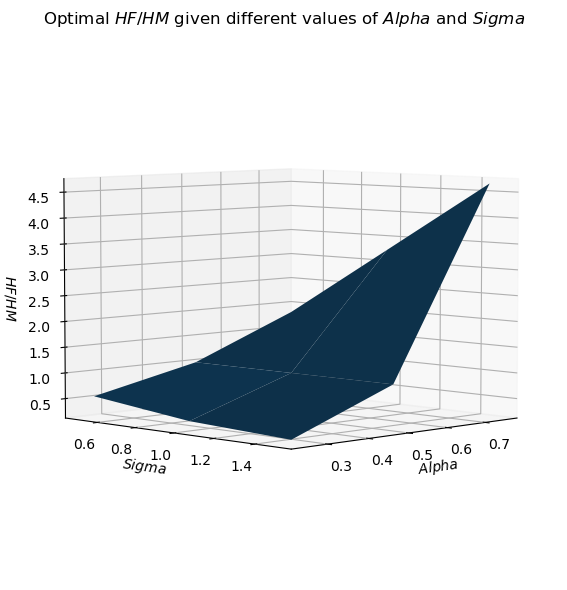

In [87]:
# a. 3d plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection='3d')
alpha_mesh,sigma_mesh = np.meshgrid(alpha_vec,sigma_vec,indexing='ij')
ax.plot_surface(alpha_mesh,sigma_mesh,H_ratio)

# b. labels
ax.set_xlabel('$Alpha$') 
ax.set_ylabel('$Sigma$')
ax.set_zlabel('$HF/HM$')
plt.title('Optimal $HF/HM$ given different values of $Alpha$ and $Sigma$')

# c. invert xaxis
ax.invert_xaxis()

# d. set view angle and distance
ax.view_init(elev=5, azim=45, roll=0)
ax.dist = 11

# tight layout
fig.tight_layout()

Above optimal $H_M/H_F$ given varying $\alpha$ and $\sigma$ values is illustrated. It seems $HF/HM$ is minimized at $\alpha=0.25$ and $\sigma=1.5$ and is maximized when $\alpha=0.75$ and $\sigma=1.5$. Given the definitions of the parameters this seems reasonable.

# Question 2

In [88]:
# a. solve the discrete solution and save the log of household work ratio
sol_discrete = model.solve_wF_vec(discrete=True)
logH_ratio_discrete = np.log(sol_discrete.HF_vec/sol_discrete.HM_vec)


We plot the solution

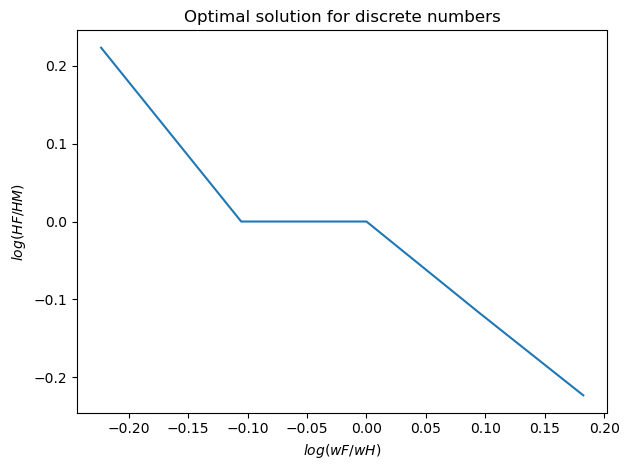

In [89]:
# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec),logH_ratio_discrete)

# b. labels
ax.set_xlabel('$log(wF/wH)$') 
ax.set_ylabel('$log(HF/HM)$')
plt.title('Optimal solution for discrete numbers')

# tight layout 
fig.tight_layout()

Above we show the requested illustration. We note the nonlinearity, which is a byproduct of using a discrete choice set.

# Question 3

Calculating the solution for the continuous model

In [90]:
# a. solve the continuous solution and save the log of household work ratio
sol = model.solve_wF_vec()
logH_ratio = np.log(sol.HF_vec/sol.HM_vec)

We plot the solution

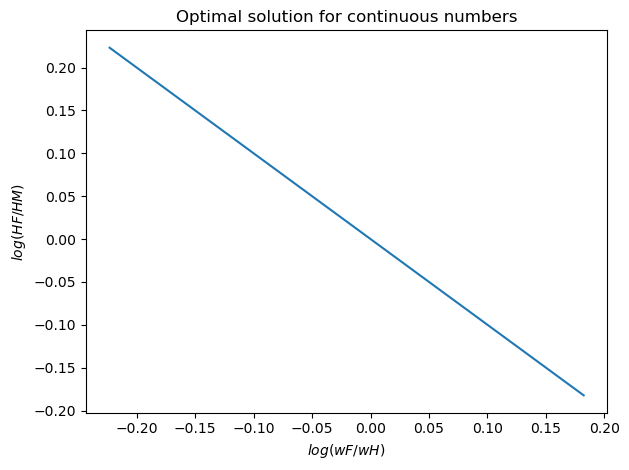

In [91]:
# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec),logH_ratio)

# b. labels
ax.set_xlabel('$log(wF/wH)$') 
ax.set_ylabel('$log(HF/HM)$')
plt.title('Optimal solution for continuous numbers')

# tight layout 
fig.tight_layout()

And above we now note, that we have a linear relationship, when using a continuous choice set. This result seems intuitive, as the agents can now act according to their exact preference.

# Question 4

We now find the solution for $\alpha$ and $\sigma$, which minimizes the error: 

In [92]:
# a. minimize the squared error using alpha and sigma and save solution
q4sol = model.estimate()
q4_alpha = model.par.alpha
q4_sigma = model.par.sigma
q4_error = q4sol.error

# b. print the solution, that minimizes the squared error
print(f'The squared error is minimized, when alpha is {model.par.alpha:.3f} and sigma is {model.par.sigma:.3f}.')
print(f'At these values our beta0 and beta1 coefficients are {model.sol.beta0:.3f} and {model.sol.beta1:.3f}.') 
print(f'With this the minimized squared error is then {q4sol.error:.3f}.') 

The squared error is minimized, when alpha is 0.982 and sigma is 0.100.
At these values our beta0 and beta1 coefficients are 0.400 and -0.100.
With this the minimized squared error is then 0.000.


We calculate the values for the illustration:

In [93]:
def error(alpha,sigma):
    """
    calculates and saves the squared error
    """        
    model.par.alpha = alpha # sets alpha value
    model.par.sigma = sigma # sets sigma value        
    
    model.solve_wF_vec() # finds optimal household production 
    sol = model.run_regression() # calculates beta0 and beta1
    error = (sol.beta0 - model.par.beta0_target)**2 +(sol.beta1 - model.par.beta1_target)**2 # calculates error
    return error

# a. setup of values for plotting
N = 10
alpha_vec = np.linspace(0.2,0.985,N)
sigma_vec = np.linspace(0.001,0.95,N)
error_values = np.zeros((N,N))

# b. solve optimal allocation for given alpha and sigma and input into matrix of squared errors
for i, alpha in enumerate(alpha_vec):
    model.par.alpha = alpha # set alpha value
    
    for j, sigma in enumerate(sigma_vec):
            sol = error(alpha,sigma) # optimal allocation solution
            error_values[i,j] = sol


We plot the solution:

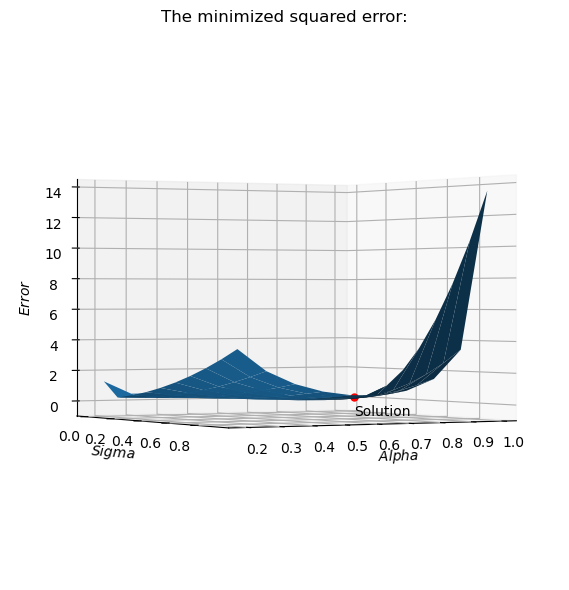

In [94]:
%matplotlib inline

# a. 3d plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection='3d')
alpha_mesh,sigma_mesh = np.meshgrid(alpha_vec,sigma_vec,indexing='ij')
ax.plot_surface(alpha_mesh,sigma_mesh,error_values)
ax.scatter(q4_alpha, q4_sigma, q4_error, c='red', s=25)

# b. labels
ax.set_xlabel('$Alpha$') 
ax.set_ylabel('$Sigma$')
ax.set_zlabel('$Error$')
plt.title('The minimized squared error:')
ax.text(q4_alpha, q4_sigma, q4_error-1.25, 'Solution')

# c. invert xaxis
ax.invert_xaxis()

# d. set view angle and distance
ax.view_init(elev=0, azim=60, roll=0)
ax.dist = 11

# e. tight layout 
fig.tight_layout()

Marked in red we have our solution, where $\alpha=0.982$ and $\sigma=0.1$, which as shown minimizes the squared error.

# Question 5

With the empirical results in mind we adapt our function to hold $\alpha$ constant at 0.5 and to our model we add...

First, we run the baseline model with $\alpha$=0.5, and without optimizing for $\epsilon_M$ and $\epsilon_F$

In [95]:
# resetting epsilon-values
model.par.epsilonM = 1
model.par.epsilonF = 1

# run baseline model
q5sol = model.est_alphacons(extended=False)

print(f'The squared error is minimized, when alpha is {model.par.alpha} and sigma is {float(model.par.sigma):3f}.')

print(f'At these values our beta0 and beta1 coefficients are {model.sol.beta0:.3f} and {model.sol.beta1:.3f}.') 

print(f'With this the minimized squared error is then {q5sol.error:.3f}.') 

The squared error is minimized, when alpha is 0.5 and sigma is 0.099707.
At these values our beta0 and beta1 coefficients are 0.000 and -0.100.
With this the minimized squared error is then 0.160.


Next, we run the extended model, where we optimize for $\epsilon_M$ and $\epsilon_F$

In [96]:
# run extended model
q5solext = model.est_alphacons(extended=True)

print(f'The squared error is minimized, when alpha is {model.par.alpha} and sigma is {model.par.sigma:.3f}.')

print(f'In addition epsilonM is {q5solext.epsilonM:.3f} and epsilonF is {q5solext.epsilonF:.3f}.')

print(f'At these values our beta0 and beta1 coefficients are {model.sol.beta0:.3f} and {model.sol.beta1:.3f}.') 

print(f'With this the minimized squared error is then {q5solext.error:.3f}.') 

The squared error is minimized, when alpha is 0.5 and sigma is 0.170.
In addition epsilonM is 1.119 and epsilonF is 1.599.
At these values our beta0 and beta1 coefficients are 0.142 and -0.100.
With this the minimized squared error is then 0.067.


So to conclude on question 5. We see, that our extension of the model produces a lower squared error, when alpha is forced to be 0.5. Our $\hat{\beta}_1$ coefficients match the results of Siminski and Yetsenga (2022), but our $\hat{\beta}_0$ coeffcients are somewhat lower than their results, meaning we estimate a higher $HF/HM$ ratio for given wages. 